# Modelos de Regressão: Regressão Polynomial

### Importando libs e funções:

Importando libs

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

Importando funções

In [2]:
# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

# Função que gera o gráfico dos resultados de regressão
def plot_results_linear(X, y, regressor, title):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, regressor.predict(X), color = 'blue')
    plt.title(title)
    plt.xlabel('Tamanho do Lote')
    plt.ylabel('Preço de Vendas')
    plt.show()

# Função que gera o gráfico dos resultados de regerssão polinomial
def plot_results_poly(X, y, lin_reg_poly, poly_reg, title):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg_poly.predict(poly_reg.fit_transform(X)), color = 'blue')
    plt.title(title)
    plt.xlabel('Tamanho do Lote')
    plt.ylabel('Preço de Vendas')
    plt.show()    
    
# Função que gera o gráfico dos resultados de arvores
def plot_results_reg(X, y, regressor, title):     
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red')
    plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
    plt.title(title)
    plt.xlabel('Tamanho do Lote')
    plt.ylabel('Preço de Vendas')
    plt.show()
     

### Etapa de exploração e tratamento dos **dados**

Importando o dataset do nosso estudo. O objetivo dos modelos de regressão será de predizer o preço das casas de acordo com diferentes características como: localização, área, etc.

Fonte: [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/intelligentagents/aprendizagem-supervisionada/master/data/pricing_houses.csv')

#Selecionando uma amostragem dos dados para uma melhor visualização
df = df.loc[:, ['LotArea', 'PoolArea', 'GarageArea', 'OverallCond','YearBuilt', 'MSZoning', 'SalePrice']].sample(n=60, random_state=0, weights = 'SalePrice')

Descrevendo o dataset

In [4]:
df.describe()

,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,SalePrice
count,60.000000,60.0,60.000000,60.000000,60.000000,60.000000
mean,11633.933333,0.0,504.683333,5.783333,1972.116667,197536.150000
std,8099.879028,0.0,222.427554,1.180228,30.522618,74910.507145
min,1477.000000,0.0,0.000000,3.000000,1875.000000,80000.000000
25%,8068.500000,0.0,440.000000,5.000000,1950.750000,142250.000000
50%,10510.000000,0.0,542.000000,5.000000,1976.500000,188750.000000
75%,12010.750000,0.0,607.250000,7.000000,2002.000000,235032.000000
max,53227.000000,0.0,1014.000000,9.000000,2009.000000,437154.000000


Visualizando o dataset

In [5]:
df.head(100)

,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,MSZoning,SalePrice
789,12205,0,444,8,1966,RL,187500
1039,1477,0,286,4,1970,RM,80000
868,14762,0,672,6,1948,RL,169000
782,16285,0,605,5,2001,RL,187100
611,10395,0,564,6,1978,RL,148000
933,8487,0,570,5,2004,RL,190000
633,9250,0,260,7,1954,RL,139400
1301,7500,0,213,7,1942,RL,177500
1405,3842,0,482,5,2004,RM,275000
554,10625,0,871,5,2003,RL,284000


Preenchendo os valores númericos nulos (NA) com a mediana.

In [6]:
df = df.fillna(df.median())

df.head(5)

/var/folders/96/v98rl5mx1sxdlg9hmsyd9bfm0000gn/T/ipykernel_6949/495370049.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,MSZoning,SalePrice
789,12205,0,444,8,1966,RL,187500
1039,1477,0,286,4,1970,RM,80000
868,14762,0,672,6,1948,RL,169000
782,16285,0,605,5,2001,RL,187100
611,10395,0,564,6,1978,RL,148000


Definindo as variáveis independentes

In [7]:
X = df.loc[:, 'LotArea'].values.reshape(-1,1)
X[:5]


array([[12205],
       [ 1477],
       [14762],
       [16285],
       [10395]])

Definindo a variável dependente (SalePrice).

In [8]:
y = df.loc[:, 'SalePrice'].values.reshape(-1,1)
y[:5]


array([[187500],
       [ 80000],
       [169000],
       [187100],
       [148000]])

 Criando os subconjuntos de treinamento e testes

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Tamanho do Dataset. {}".format(df.shape[0]))
print("Tamanho do Conjunto de Treinamento. {}".format(len(X_train)))
print("Tamanho do Conjunto de Testes. {}".format(len(X_test)))

Tamanho do Dataset. 60
Tamanho do Conjunto de Treinamento. 48
Tamanho do Conjunto de Testes. 12


Normalizando as features 

In [10]:
#X_train = feature_scaling(X_train)
#X_test = feature_scaling(X_test)

#X_train[:5]

### Etapa de Treinamento e Validação do Modelo

Importando e treinando o modelo de Regressão Linear com o Conjunto de Treinamento:

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Transformando as features na quarta ordem polinomial:

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

PolynomialFeatures(degree=5)

Treinando o modelo de regressão polynomial com o conjunto de treinamento:

In [13]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)


LinearRegression()

Prevendo os resultados do modelo criado com o conjunto de testes

In [14]:
y_pred = lin_reg_poly.predict(X_poly)

y_pred[:5]

array([[200599.21802345],
       [165854.64678526],
       [221415.37274958],
       [235885.53492076],
       [188829.29278048]])

Avaliando o modelo de regressão linear com a métrica r2:

In [15]:
regressor.score(X, y)

0.14645648066355865

Avaliando o modelo de regressão polynomial com a métrica r2:

In [16]:
lin_reg_poly.score(X_poly, y)

0.2377095483470565

Visualizando os resultados da regressão linear:

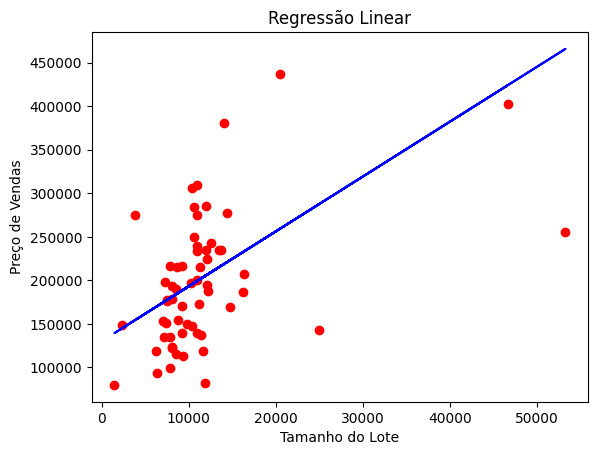

In [17]:
plot_results_linear(X, y, regressor, 'Regressão Linear')

Visualizando os resultados da regressão linear polinomial:

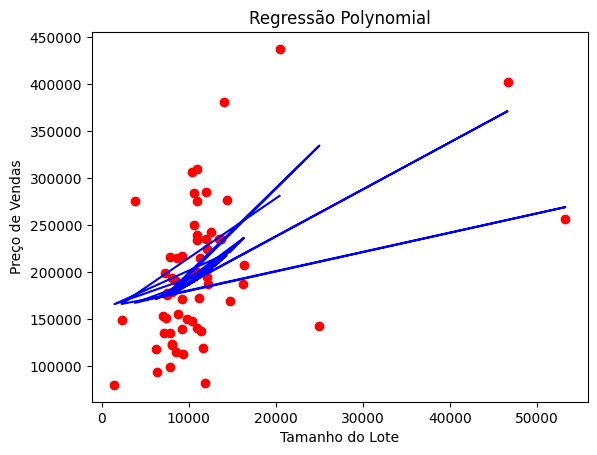

In [18]:
plot_results_poly(X, y, lin_reg_poly, poly_reg, 'Regressão Polynomial')